<a href="https://colab.research.google.com/github/lilaceri/projects/blob/main/Tara_dissertation/Tara_wrangling_diss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/ThursNewSurveydataset.csv"
df = pd.read_csv(url)

#city = 1 
#town = 2
#village = 3
#small town = 4
#isolated dwelling = 5

#did not attend school = 1
#primary = 2
#secondary = 3 
#college/highschool = 4
#undergrad = 5
#masters or higher = 6

#female = 1 
#male = 2
#nonbinary = 3
#other = 4 
#prefer not to say = 5

# def normalise(df, column, value):
#   for i in df[column]:
#     if i == value:
#       return 1 
#     else: 
#       return 0

# df['residence_city'] = df.apply(normalise(df,'Q34_Placeofresidence', 1), axis =1)

df

  

,Q1_consent,Q2_Over18,Q3_Residentuk,Q1_knowledge,Q2_Knowledge,Q6_Konwledge,Q7_Knowledge,Q8_Knowledge,Q9_Knowledge,Q10_Knowledge,Q1_bisonimpacts,Q2_bisonimpacts,Q3_bisonimpacts,Q4_bisonimpacts,Q5_bisonimpacts,Q6_bisonimpacts,Q7_bisonimpacts,Q8_bisonimpacts,Q9_bisonimpacts,Q10_bisonimpacts,Q11_bisonimpacts,Q12_bisonimpacts,Q1_reintroduction,Q2_reintroduction,Q3_reintroduction,Q4_reintroduction,Q5_reintroduction,Q6_reintroduction,Q7_reintroductionother,Q7_reintroduction,Q22_demoage,Q23_demoage,Q24_demoage,Q25_demoage,Q26_demoage,Q27_demoage,Q28_demoage,Q29_gender,Q30_Ethnicity,Q31_Ethnicityother,Q32_Occupation,Q33_Educationlevel,Q34_Placeofresidence,Q_LocationUK,Q30_wheresurvey,Q30_other
0,1,1,1,2,2,1,3,1,2,3,4,4,2,4,4,4,4,4,4,4,4,2,5,1,1,1,3,2,,4,0,0,0,0,1,0,0,1,1,,27,5,3,7,1,
1,1,1,1,2,2,1,3,1,2,3,5,2,1,5,3,5,4,5,5,5,3,4,5,1,1,1,1,2,,6,0,1,0,0,0,0,0,2,1,,8,5,2,7,6,email
2,1,1,1,2,1,1,3,1,2,3,4,4,4,5,2,4,4,5,5,5,5,5,5,1,1,1,2,2,,10,1,0,0,0,0,0,0,1,1,,8,6,4,4,1,
3,1,1,1,2,2,1,3,1,2,3,3,3,3,4,3,4,3,4,3,4,4,2,4,2,1,1,3,9,,3,0,0,0,0,0,1,0,1,1,,7,6,3,7,1,
4,1,1,1,2,2,1,3,1,2,3,4,4,1,5,4,4,4,5,4,1,5,4,4,1,3,1,4,2,,2,0,0,0,0,1,0,0,1,9,,7,6,2,7,4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,1,1,1,1,2,3,3,3,2,3,4,4,4,4,4,4,4,5,4,5,5,4,5,1,1,1,3,2,,3,0,0,0,0,0,1,0,1,1,,8,6,3,1,1,
384,1,1,2,4,1,3,3,1,2,5,4,3,2,4,3,3,4,3,3,4,4,2,4,2,1,1,1,2,,5,0,0,0,0,1,0,0,2,1,,1,5,5,1,1,
385,1,1,1,2,2,1,3,1,2,3,4,3,2,5,5,4,5,5,5,4,3,3,5,1,1,1,3,5,,2,0,0,0,0,0,1,0,1,1,,7,4,2,8,1,
386,1,1,1,2,2,3,3,1,2,3,5,5,3,5,4,4,3,5,3,5,4,4,5,1,1,1,2,11,All of the above.,10,0,0,0,1,0,0,0,1,4,,7,5,3,7,1,


In [ ]:
# df.info()
df.loc[184, 'Q2_bisonimpacts'] = 1
# pd.to_numeric(df['Q2_bisonimpacts'])
df['Q2_bisonimpacts'] = df['Q2_bisonimpacts'].astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Q1_consent              388 non-null    int64 
 1   Q2_Over18               388 non-null    int64 
 2   Q3_Residentuk           388 non-null    int64 
 3   Q1_knowledge            388 non-null    int64 
 4   Q2_Knowledge            388 non-null    int64 
 5   Q6_Konwledge            388 non-null    int64 
 6   Q7_Knowledge            388 non-null    int64 
 7   Q8_Knowledge            388 non-null    int64 
 8   Q9_Knowledge            388 non-null    int64 
 9   Q10_Knowledge           388 non-null    int64 
 10  Q1_bisonimpacts         388 non-null    int64 
 11  Q2_bisonimpacts         388 non-null    int64 
 12  Q3_bisonimpacts         388 non-null    int64 
 13  Q4_bisonimpacts         388 non-null    int64 
 14  Q5_bisonimpacts         388 non-null    int64 
 15  Q6_bis

In [ ]:
# q2, q3, q5, q7, q9, q12

# def reverseScoring(df, high, cols):
#     '''Reverse scores on given columns
#      df = your data frame,
#      high = highest score available
#      cols = the columns you want reversed in list form'''
#     df[cols] = high - df[cols]
#     return df

# cols = ['Q2_bisonimpacts', 'Q3_bisonimpacts', 'Q5_bisonimpacts', 'Q7_bisonimpacts', 'Q9_bisonimpacts', 'Q12_bisonimpacts']
# high = 6

# df = reverseScoring(df, high, cols)

df

# def reverse(df, column):
#   for i in df[column]:
#     return 5 - i 

#df['Q1_bisonimpacts'] = df.apply(reverse, args = cols)

df['overall_bison_impacts'] = df['Q1_bisonimpacts'] + df['Q2_bisonimpacts'] + df['Q3_bisonimpacts'] + df['Q4_bisonimpacts'] + df['Q5_bisonimpacts'] + df['Q6_bisonimpacts'] +	df['Q7_bisonimpacts'] +	df['Q8_bisonimpacts']	+ df['Q9_bisonimpacts'] +  df['Q10_bisonimpacts'] + df['Q11_bisonimpacts'] + df['Q12_bisonimpacts']

df['economy_impact'] = df['Q1_bisonimpacts'] + df['Q3_bisonimpacts'] + df['Q6_bisonimpacts']
df['environment_impact'] = df['Q4_bisonimpacts'] + df['Q8_bisonimpacts'] + df['Q9_bisonimpacts'] + df['Q10_bisonimpacts'] + df['Q12_bisonimpacts']
df['resources_impact'] = df['Q2_bisonimpacts'] + df['Q5_bisonimpacts'] + df['Q7_bisonimpacts']
df['human_impact'] = df['Q11_bisonimpacts'] + df['Q5_bisonimpacts'] 


# Q1 = 2 
# Q2 = 2 
# Q3 = 1 
# Q4 = 3
# Q5 = 1
# Q6 = 2
# Q7 = 3 


# def know(df):
#   count = 0
#   if df['Q1_knowledge'] == 2:
#     count += 1 
#   elif df['Q2_Knowledge'] == 2:
#     count += 1
#   elif df['Q6_Konwledge'] == 1:
#     count += 1
#   elif df['Q7_Knowledge'] == 3:
#     count += 1
#   elif df['Q8_Knowledge'] == 1:
#     count += 1
#   elif df['Q9_Knowledge'] == 2:
#     count += 1 
#   elif df['Q10_Knowledge'] == 3:
#     count += 1
#   else:
#     count += 0 

#   return count 


# df['knowledge_1'] = df.apply(know, axis = 1)
def knowledge(df, column, value):
    if df[column] == value:
      return 1
    else:
      return 0


df['Q1_knowledge'] = df.apply(knowledge, axis=1, column='Q1_knowledge', value =2)

df['Q2_Knowledge'] = df.apply(knowledge, axis=1, column='Q2_Knowledge', value= 2)


df['Q6_Konwledge'] = df.apply(knowledge, axis=1, column='Q6_Konwledge', value= 1)


df['Q7_Knowledge'] = df.apply(knowledge, axis=1, column='Q7_Knowledge', value = 3)

df['Q8_Knowledge'] = df.apply(knowledge, axis=1, column='Q8_Knowledge', value=1)

df['Q9_Knowledge'] = df.apply(knowledge, axis=1, column='Q9_Knowledge', value=2)

df['Q10_Knowledge'] = df.apply(knowledge, axis=1, column='Q10_Knowledge', value=3)


df['knowledge'] = df['Q1_knowledge'] + df['Q2_Knowledge'] + df['Q6_Konwledge'] + df['Q7_Knowledge'] + df['Q8_Knowledge'] + df['Q9_Knowledge'] + df['Q10_Knowledge']
df1 = df[df['Q1_consent'] != 2]
df2 = df1[df1['Q2_Over18'] != 2]
df3 = df2[df2['Q3_Residentuk'] != 2]
df4 = df3[['human_impact', 'economy_impact', 'resources_impact', 'environment_impact','knowledge', 'overall_bison_impacts', 'Q1_reintroduction', 'Q22_demoage','Q23_demoage',	'Q24_demoage',	'Q25_demoage',	'Q26_demoage',	'Q27_demoage',	'Q28_demoage', 'Q34_Placeofresidence', 'Q33_Educationlevel', 'Q29_gender', 'Q32_Occupation']]
df4['18_24'] = df4['Q22_demoage']
df4['25_34'] = df4['Q23_demoage']
df4['35_44'] = df4['Q24_demoage']
df4['45_54'] = df4['Q25_demoage']
df4['55_64'] = df4['Q26_demoage']
df4['65_74'] = df4['Q27_demoage']
df4['over_75'] = df4['Q28_demoage']


df5 = df4[['human_impact', 'economy_impact', 'resources_impact', 'environment_impact','knowledge', 'overall_bison_impacts', 'Q1_reintroduction', '18_24', '25_34', '35_44', '45_54', '55_64', '65_74', 'over_75', 'Q34_Placeofresidence', 'Q33_Educationlevel', 'Q29_gender', 'Q32_Occupation']]

df5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,human_impact,economy_impact,resources_impact,environment_impact,knowledge,overall_bison_impacts,Q1_reintroduction,18_24,25_34,35_44,45_54,55_64,65_74,over_75,Q34_Placeofresidence,Q33_Educationlevel,Q29_gender,Q32_Occupation
0,8,10,12,18,2,44,5,0,0,0,0,1,0,0,3,5,1,27
1,6,11,9,24,2,47,5,0,1,0,0,0,0,0,2,5,2,8
2,7,12,10,25,2,52,5,1,0,0,0,0,0,0,4,6,1,8
3,7,10,9,17,2,40,4,0,0,0,0,0,1,0,3,6,1,7
4,9,9,12,19,2,45,4,0,0,0,0,1,0,0,2,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,5,10,6,17,2,36,4,1,0,0,0,0,0,0,5,6,1,24
383,9,12,12,22,0,51,5,0,0,0,0,0,1,0,3,6,1,8
385,8,10,13,22,2,48,5,0,0,0,0,0,1,0,2,4,1,7
386,8,12,12,22,1,50,5,0,0,0,1,0,0,0,3,5,1,7


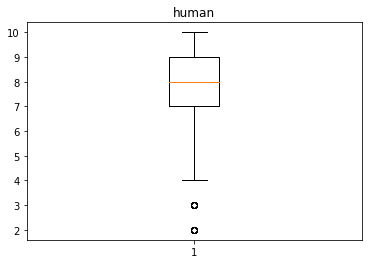

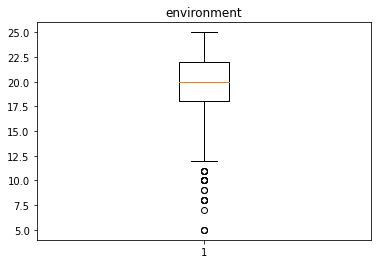

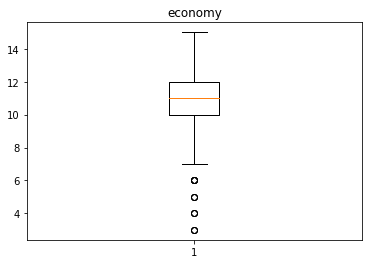

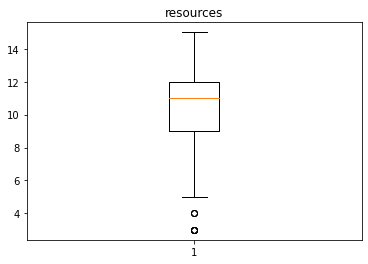

In [ ]:
plt.boxplot(df5['human_impact'])
plt.title('human')
plt.show()

plt.boxplot(df5['environment_impact'])
plt.title('environment')
plt.show()

plt.boxplot(df5['economy_impact'])
plt.title('economy')
plt.show()

plt.boxplot(df5['resources_impact'])
plt.title('resources')
plt.show()


#definitely some outliers there

In [ ]:
#outliers

def outliers_u(df, column):
  q3 = df[column].quantile(.75)
  q1 = df[column].quantile(.25)
  iqr = q3 - q1 
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  return upper

def outliers_l(df, column):
  q3 = df[column].quantile(.75)
  q1 = df[column].quantile(.25)
  iqr = q3 - q1 
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  return lower
 

# iqr = df5['human_impact'].quantile(.75) - df5['human_impact'].quantile(.25)
# q3 = df5['human_impact'].quantile(.75)
# q1 = df5['human_impact'].quantile(.25)
# upper = q3+ 1.5*iqr 
# lower = q1 - 1.5*iqr

human_up = outliers_u(df, 'human_impact')
enviro_up = outliers_u(df, 'environment_impact')
res_up = outliers_u(df, 'resources_impact')
economy_up = outliers_u(df, 'economy_impact')

human_l = outliers_l(df, 'human_impact')
enviro_l = outliers_l(df, 'environment_impact')
res_l = outliers_l(df, 'resources_impact')
economy_l = outliers_l(df, 'economy_impact')

df_f = df5[(df5['human_impact'] < human_up) & (df5['human_impact'] > human_l)]
df_f = df_f[(df_f['environment_impact'] < enviro_up) & (df_f['environment_impact'] > enviro_l)]
df_f = df_f[(df_f['resources_impact'] < res_up) & (df_f['resources_impact'] > res_l)]
df_f = df_f[(df_f['economy_impact'] < economy_up) & (df_f['economy_impact'] > economy_l)]

know_l = outliers_l(df, 'knowledge')
know_u = outliers_u(df, 'knowledge')

df_f = df_f[(df_f['knowledge'] < know_u) & (df_f['knowledge'] > know_l)]

# iqr = df5['environment_impact'].quantile(.75) - df5['environment_impact'].quantile(.25)
# q3 = df5['environment_impact'].quantile(.75)
# q1 = df5['environment_impact'].quantile(.25)
# upper = q3+ 1.5*iqr 
# lower = q1 - 1.5*iqr


# df_f = df5[(df5['human_impact'] < upper) & (df5['human_impact'] > lower)]

print(human_up)


12.0


In [ ]:
df_f

,human_impact,economy_impact,resources_impact,environment_impact,knowledge,overall_bison_impacts,Q1_reintroduction,18_24,25_34,35_44,45_54,55_64,65_74,over_75,Q34_Placeofresidence,Q33_Educationlevel,Q29_gender,Q32_Occupation
0,8,10,12,18,2,44,5,0,0,0,0,1,0,0,3,5,1,27
1,6,11,9,24,2,47,5,0,1,0,0,0,0,0,2,5,2,8
2,7,12,10,25,2,52,5,1,0,0,0,0,0,0,4,6,1,8
3,7,10,9,17,2,40,4,0,0,0,0,0,1,0,3,6,1,7
4,9,9,12,19,2,45,4,0,0,0,0,1,0,0,2,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,5,10,6,17,2,36,4,1,0,0,0,0,0,0,5,6,1,24
383,9,12,12,22,0,51,5,0,0,0,0,0,1,0,3,6,1,8
385,8,10,13,22,2,48,5,0,0,0,0,0,1,0,2,4,1,7
386,8,12,12,22,1,50,5,0,0,0,1,0,0,0,3,5,1,7


{'boxes': [<matplotlib.lines.Line2D at 0x7f69a415c550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f69a4162590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f69a41685d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f69a4168090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f69a415cad0>,
  <matplotlib.lines.Line2D at 0x7f69a4162050>]}

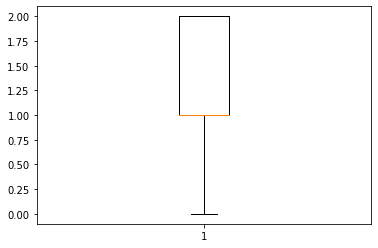

In [ ]:
plt.boxplot(df_f['knowledge'])

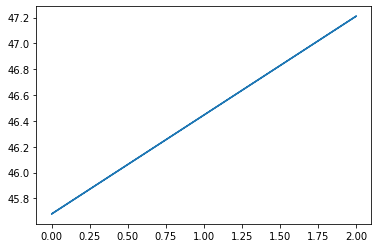

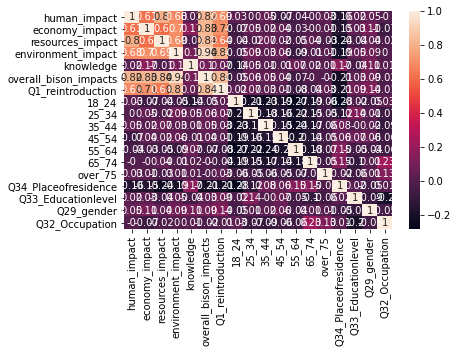

In [ ]:
from scipy.stats import linregress
import seaborn as sns

y = df_f['overall_bison_impacts']
x = df_f['knowledge']

reg = linregress(x,y)
plt.plot(x, reg.slope*x + reg.intercept)
plt.show()

plt.scatter(y,x)

corr_matrix = df5.corr().round(2)
sns.heatmap(corr_matrix, annot = True)

In [ ]:
df_f.to_csv('updated_tara_3.csv')